Download data set 

In [2]:
!pip install ucimlrepo -q


In [1]:
# Colab/Local
from ucimlrepo import fetch_ucirepo
ds = fetch_ucirepo(id=320)
data1 = ds.data.features
data2 = ds.data.targets

In [2]:
import pandas as pd
df = pd.concat([data1, data2], axis=1)
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [3]:
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [4]:
# check for missing values
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
#  check for duplicates
print(df.duplicated().sum())

0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Rows/Columns: 649 × 33

Types: 16 numerical (int64), 17 categorical (object)

Missing Values: None

dublicate :None 

Validation: Schema matches expected; types are correct


In [7]:
# check the outliers 

numeric_cols = df.select_dtypes(include=['int64']).columns

outlier_report = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_report[col] = len(outliers)

for col , nout in outlier_report.items():
    print(f"{col}:{nout} outliers")


age:1 outliers
Medu:0 outliers
Fedu:0 outliers
traveltime:16 outliers
studytime:35 outliers
failures:100 outliers
famrel:51 outliers
freetime:45 outliers
goout:0 outliers
Dalc:34 outliers
Walc:0 outliers
health:0 outliers
absences:21 outliers
G1:16 outliers
G2:25 outliers
G3:16 outliers


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print("Max absences:", df['absences'].max())
print("Top 10 values:\n", df['absences'].sort_values(ascending=False).head(10))


Max absences: 32
Top 10 values:
 197    32
212    30
256    26
150    24
325    22
155    22
217    21
413    21
326    18
253    18
Name: absences, dtype: int64


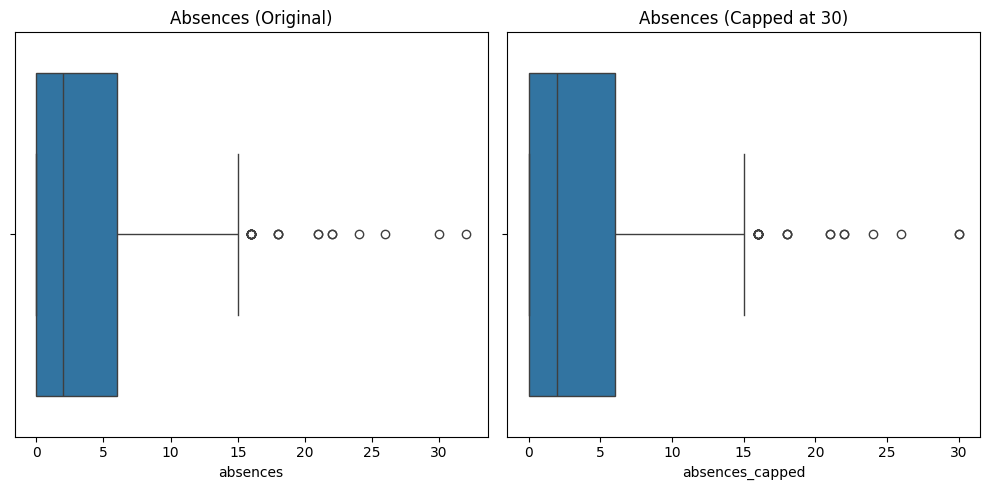

In [10]:
# capping 
df['absences_capped'] = np.where(df['absences'] > 30, 30, df['absences'])
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['absences'])
plt.title("Absences (Original)")

plt.subplot(1,2,2)
sns.boxplot(x=df['absences_capped'])
plt.title("Absences (Capped at 30)")

plt.tight_layout()
plt.show()

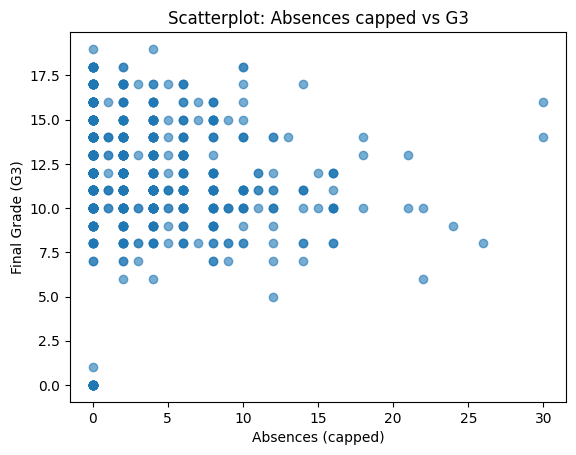

In [11]:
plt.scatter(df['absences_capped'], df['G3'], alpha=0.6)
plt.xlabel("Absences (capped)")
plt.ylabel("Final Grade (G3)")
plt.title("Scatterplot: Absences capped vs G3")
plt.show()


The absences column showed a few extreme values (18–32 days), compared to the majority of students with <10 absences.

To avoid distortion, values above 30 were capped at 30.

This keeps the data realistic while minimizing the impact of extreme cases.

In [12]:
# outlier in age 
print("Age value counts:\n", df['age'].value_counts().sort_index())


Age value counts:
 age
15    112
16    177
17    179
18    140
19     32
20      6
21      2
22      1
Name: count, dtype: int64


Data Preparation Summary

Schema & Types: Validated 33 features (16 numeric, 17 categorical). No missing values or duplicates.

Outlier Handling:

Absences: capped at 30 to reduce skew from extreme values.

Age, G1, G2, G3, Failures, Studytime, Dalc, Famrel, Freetime, Traveltime: retained, as outliers reflect realistic student outcomes or behaviors.

Medu, Fedu, Goout, Walc, Health: no outliers detected.

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


Data Transformation

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [14]:
df2=df.copy()


In [15]:
# categorical variables
# categorical_cols =['school', 'sex', 'address', 'famsize', 'Pstatus',
# 'Mjob', 'Fjob', 'reason', 'guardian',
# 'schoolsup', 'famsup', 'paid', 'activities',
# 'nursery', 'higher', 'internet', 'romantic'
# ]
categorical_cols=df.select_dtypes(include=['object']).columns

for i in categorical_cols:
    df2[i]=df2[i].astype('category')
df2.dtypes


school             category
sex                category
age                   int64
address            category
famsize            category
Pstatus            category
Medu                  int64
Fedu                  int64
Mjob               category
Fjob               category
reason             category
guardian           category
traveltime            int64
studytime             int64
failures              int64
schoolsup          category
famsup             category
paid               category
activities         category
nursery            category
higher             category
internet           category
romantic           category
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
G1                    int64
G2                    int64
G3                    int64
absences_capped       int64
dtype: object

In [16]:
# One-Hot Encoding
df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

df2.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
absences_capped      int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_home           bool
reason_other          bool
reason_reputation     bool
guardian_mother       bool
guardian_other        bool
schoolsup_yes         bool
famsup_yes            bool
p

In [17]:
for col in df2.select_dtypes(include=['bool']).columns:
    df2[col] = df2[col].astype(int)
df2.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
absences_capped      int64
school_MS            int64
sex_M                int64
address_U            int64
famsize_LE3          int64
Pstatus_T            int64
Mjob_health          int64
Mjob_other           int64
Mjob_services        int64
Mjob_teacher         int64
Fjob_health          int64
Fjob_other           int64
Fjob_services        int64
Fjob_teacher         int64
reason_home          int64
reason_other         int64
reason_reputation    int64
guardian_mother      int64
guardian_other       int64
schoolsup_yes        int64
famsup_yes           int64
p

In [18]:
# standardization
scaler = StandardScaler()
numeric_cols=df2.select_dtypes(include=['int64']).columns
df2[numeric_cols]=scaler.fit_transform(df2[numeric_cols])
df2.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,0.652973,-0.259681,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,-1.531457,-0.259681,-0.342110,0.794137,-0.252853,-0.971140,-2.017502,0.344914,0.550648,-0.763496
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,0.652973,-0.259681,2.923032,-1.259229,-0.252853,-0.971140,0.495663,0.344914,0.550648,-0.763496
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,0.652973,-0.259681,-0.342110,0.794137,-0.252853,1.029717,0.495663,0.344914,0.550648,1.309764
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,-1.531457,-0.259681,-0.342110,0.794137,-0.252853,-0.971140,0.495663,0.344914,-1.816043,-0.763496


In [19]:
# features engineering
# attendance proxy = higher value means better attendance
df2['attendance'] = 1 - (df['absences_capped'] / df['absences_capped'].max())
df2.attendance


0      0.866667
1      0.933333
2      0.800000
3      1.000000
4      1.000000
         ...   
644    0.866667
645    0.866667
646    0.800000
647    0.800000
648    0.866667
Name: attendance, Length: 649, dtype: float64

In [20]:
# average of G1–G3
df2['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
df2.avg_grade

0       7.333333
1      10.333333
2      12.333333
3      14.000000
4      12.333333
         ...    
644    10.333333
645    15.333333
646    10.666667
647    10.000000
648    10.666667
Name: avg_grade, Length: 649, dtype: float64

In [21]:
df2['passs'] = (df['G3'] >= 10).astype(int)
df2.passs


0      1
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    0
647    1
648    1
Name: passs, Length: 649, dtype: int64

In [22]:
def risk_level(g3):
    if g3 < 10:
        return "High"
    elif g3 < 15:
        return "Medium"
    else:
        return "Low"

df2['risk'] = df['G3'].apply(risk_level)
df2.risk


0      Medium
1      Medium
2      Medium
3      Medium
4      Medium
        ...  
644    Medium
645       Low
646      High
647    Medium
648    Medium
Name: risk, Length: 649, dtype: object

In [23]:
df2_leakage=df2.copy()
df2_noleakage=df2.drop(columns=['G1', 'G2'],axis=1)

Data Transformation Summary
Categorical variables were one-hot encoded to make them suitable for ML models. Numeric features were standardized using z-scores to ensure comparability across different scales. Feature engineering was applied: (i) an attendance proxy was derived from absences, (ii) the average of G1–G3 was created, and (iii) binary and three-tier targets (pass/risk) were defined based on G3. To address potential data leakage, two dataset variants were prepared—one including G1/G2 and one excluding them—for fair model evaluation.

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

EDA


In [24]:
# descriptive statistics
# age	absences_capped	G1	G2	G3	failures

key_features=['absences_capped', 'G1', 'G3', 'G2', 'age', 'failures']
df[key_features].describe(include='all')

,absences_capped,G1,G3,G2,age,failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,3.656394,11.399076,11.906009,11.570108,16.744222,0.221880
std,4.622539,2.745265,3.230656,2.913639,1.218138,0.593235
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,0.000000,10.000000,10.000000,10.000000,16.000000,0.000000
50%,2.000000,11.000000,12.000000,11.000000,17.000000,0.000000
75%,6.000000,13.000000,14.000000,13.000000,18.000000,0.000000
max,30.000000,19.000000,19.000000,19.000000,22.000000,3.000000


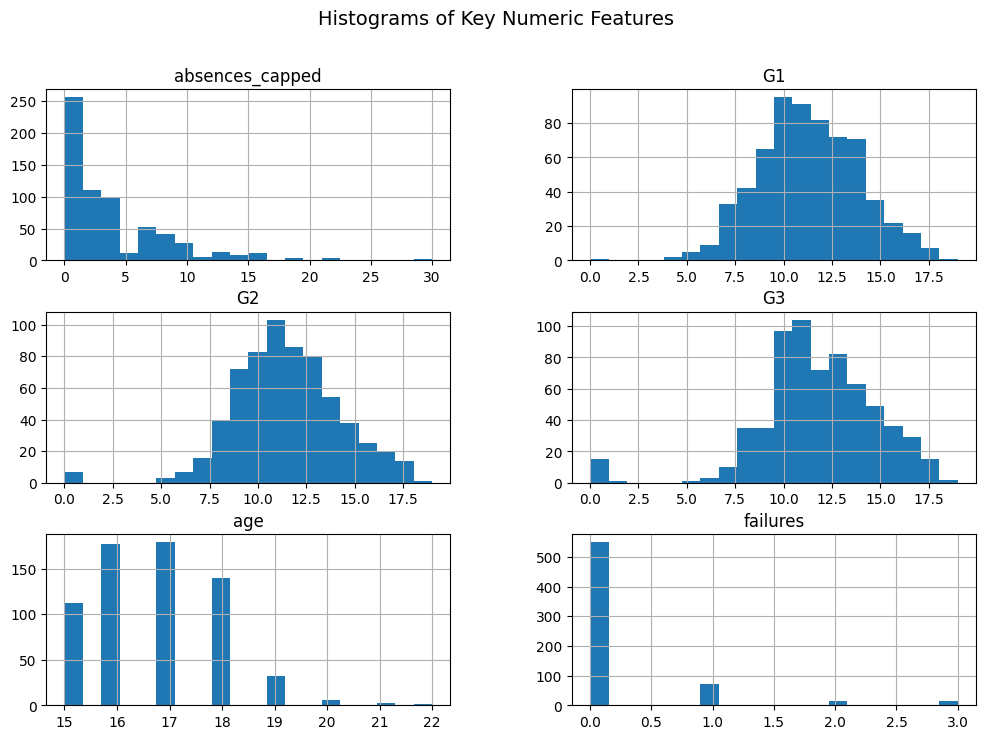

In [25]:

key_features = ['absences_capped', 'G1', 'G2', 'G3', 'age', 'failures']

df[key_features].hist(bins=20, figsize=(12,8))
plt.suptitle("Histograms of Key Numeric Features", fontsize=14)
plt.show()

In [26]:
# corr matrix
# age, studytime, failures, G1, G2, G3, attendance, avg_grade ,'Medu', 'Fedu',absences_capped
corr_matrix = df2[['age', 'studytime', 'failures', 'G1', 'G2', 'G3', 'attendance', 'avg_grade','Medu', 'Fedu','absences_capped']].corr()
corr_with_G3=corr_matrix['G3'].sort_values(ascending=False)
corr_with_G3


G3                 1.000000
avg_grade          0.961829
G2                 0.918548
G1                 0.826387
studytime          0.249789
Medu               0.240151
Fedu               0.211800
attendance         0.092172
absences_capped   -0.092172
age               -0.106505
failures          -0.393316
Name: G3, dtype: float64

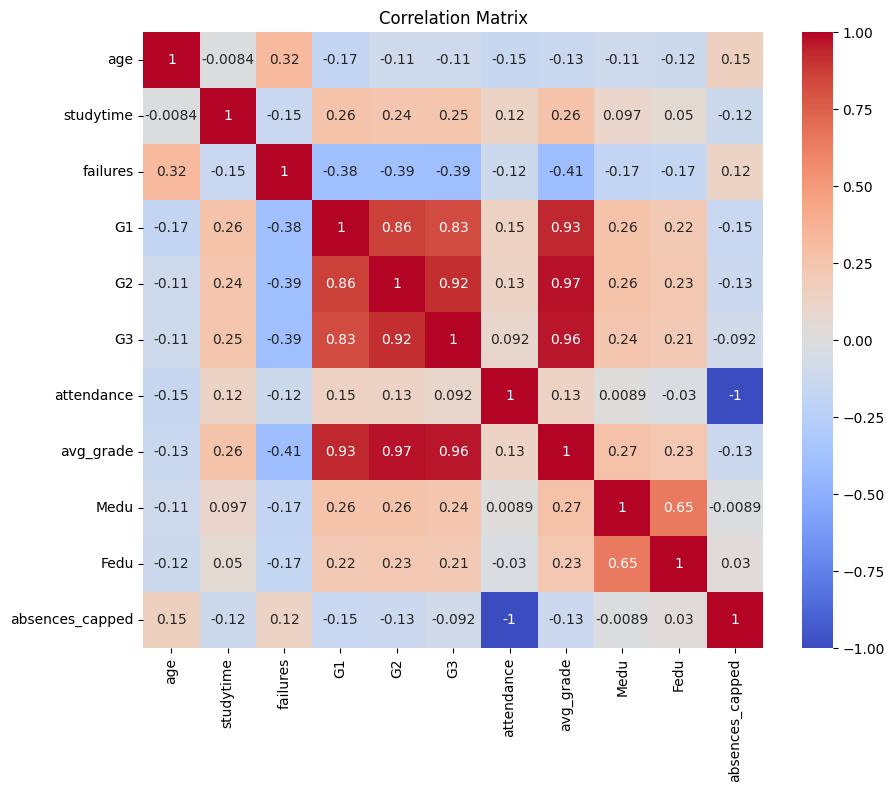

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
# group comparisons 
group_comp=['schoolsup','failures','studytime']
for col in group_comp:
    print(f"\nGroup comparison for {col}:")
    print(df.groupby(col)['G3'].mean())



Group comparison for schoolsup:
schoolsup
no     11.979346
yes    11.279412
Name: G3, dtype: float64

Group comparison for failures:
failures
0    12.510018
1     8.642857
2     8.812500
3     8.071429
Name: G3, dtype: float64

Group comparison for studytime:
studytime
1    10.844340
2    12.091803
3    13.226804
4    13.057143
Name: G3, dtype: float64


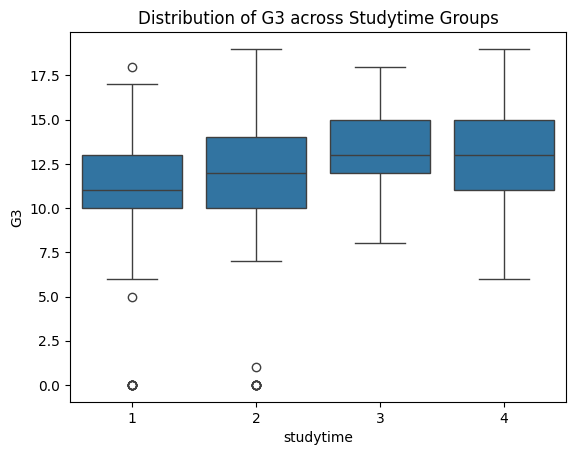

In [29]:
sns.boxplot(x="studytime", y="G3", data=df)
plt.title("Distribution of G3 across Studytime Groups")
plt.show()

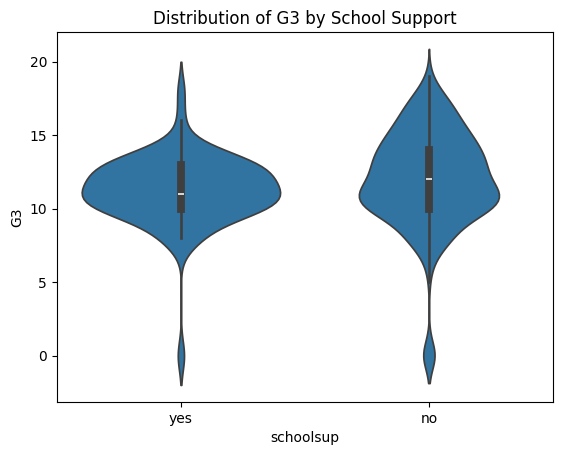

In [30]:
sns.violinplot(x="schoolsup", y="G3", data=df)
plt.title("Distribution of G3 by School Support")
plt.show()

In [31]:
from scipy.stats import ttest_ind, f_oneway, pearsonr

In [32]:
# 3–5 testable hypotheses stated and addressed
# Hypothesis 1: failures vs G3 (ANOVA)
groups = [df[df['failures']==i]['G3'].dropna() for i in sorted(df['failures'].unique())]
f_stat, p_val = f_oneway(*groups)
print("failures vs G3 (ANOVA) → F =", f_stat, ", p =", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")
print("-"*50)



failures vs G3 (ANOVA) → F = 51.38582794045558 , p = 8.644516356430469e-30
Reject H0
--------------------------------------------------


In [33]:
# Hypothesis 2: studytime vs G3 (ANOVA)
groups = [df[df['studytime']==i]['G3'].dropna() for i in sorted(df['studytime'].unique())]
f_stat, p_val = f_oneway(*groups)
print("studytime vs G3 (ANOVA) → F =", f_stat, ", p =", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")
print("-"*50)


studytime vs G3 (ANOVA) → F = 15.876267993177121 , p = 5.705728458962843e-10
Reject H0
--------------------------------------------------


In [35]:
# Hypothesis 4: absences_capped vs G3 (Correlation)
r, p_val = pearsonr(df['absences_capped'], df['G3'])
print("absences_capped vs G3 (Correlation) → r =", r, ", p =", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")
print("-"*50)

absences_capped vs G3 (Correlation) → r = -0.09217200540634342 , p = 0.018844106173698832
Reject H0
--------------------------------------------------


In [36]:
# Hypothesis 3: famrel vs G3 (ANOVA)
groups = [df[df['famrel']==i]['G3'].dropna() for i in sorted(df['famrel'].unique())]
f_stat, p_val = f_oneway(*groups)
print("famrel vs G3 (ANOVA) → F =", f_stat, ", p =", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")
print("-"*50)


famrel vs G3 (ANOVA) → F = 3.6779077023875293 , p = 0.005684830602219902
Reject H0
--------------------------------------------------


In [37]:
# Hypothesis 5: internet vs G3 (t-test)
g_yes = df[df['internet']=="yes"]['G3'].dropna()
g_no  = df[df['internet']=="no"]['G3'].dropna()
t_stat, p_val = ttest_ind(g_yes, g_no, equal_var=False)
print("internet vs G3 (t-test) → t =", t_stat, ", p =", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")
print("-"*50)

internet vs G3 (t-test) → t = 3.658007610910068 , p = 0.0003153288773932979
Reject H0
--------------------------------------------------


Results summary:

Failures and studytime show strong effects on G3 (p < 0.001).

Absences, family relationship, and internet access also have significant but weaker impacts.

Overall, more failures lower grades, while more studytime, better family support, and internet access improve performance.


-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------


Unsupervised Learning (K-Means)


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [39]:
features = ['studytime', 'absences_capped', 'goout', 'freetime', 
            'famsup_yes', 'schoolsup_yes']
x= df2[features]
x

,studytime,absences_capped,goout,freetime,famsup_yes,schoolsup_yes
0,0.083653,0.074390,0.693785,-0.171647,-1.259229,2.923032
1,0.083653,-0.358606,-0.157380,-0.171647,0.794137,-0.342110
2,0.083653,0.507386,-1.008546,-0.171647,-1.259229,2.923032
3,1.290114,-0.791603,-1.008546,-1.123771,0.794137,-0.342110
4,0.083653,-0.791603,-1.008546,-0.171647,0.794137,-0.342110
...,...,...,...,...,...,...
644,1.290114,0.074390,-1.008546,0.780478,-1.259229,-0.342110
645,0.083653,0.074390,0.693785,-0.171647,0.794137,-0.342110
646,0.083653,0.507386,-1.859711,-2.075896,-1.259229,-0.342110
647,-1.122808,0.507386,1.544950,0.780478,-1.259229,-0.342110


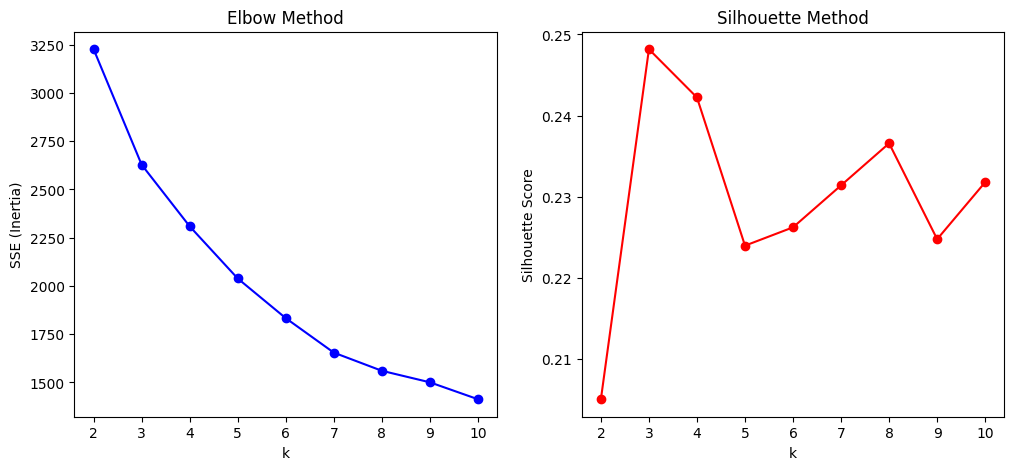

In [40]:
sse = []   # sum of squared errors
silhouette_scores = []

K = range(2, 11)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)  # inertia = sum of squared distances
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, sse, 'bo-')
plt.xlabel('k')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.show()


k in elbow method is 7 

k insilhouette score is 3


In [41]:
# k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df2['cluster_3'] = kmeans_3.fit_predict(x)
print("Cluster sizes (k=3):")
print(df2['cluster_3'].value_counts())
# k=7
kmeans_7 = KMeans(n_clusters=7, random_state=42, n_init=10)
df2['cluster_7'] = kmeans_7.fit_predict(x)
print("\nCluster sizes (k=7):")
print(df2['cluster_7'].value_counts())

Cluster sizes (k=3):
cluster_3
1    349
0    232
2     68
Name: count, dtype: int64

Cluster sizes (k=7):
cluster_7
5    122
2    117
6    115
1     98
0     82
4     68
3     47
Name: count, dtype: int64


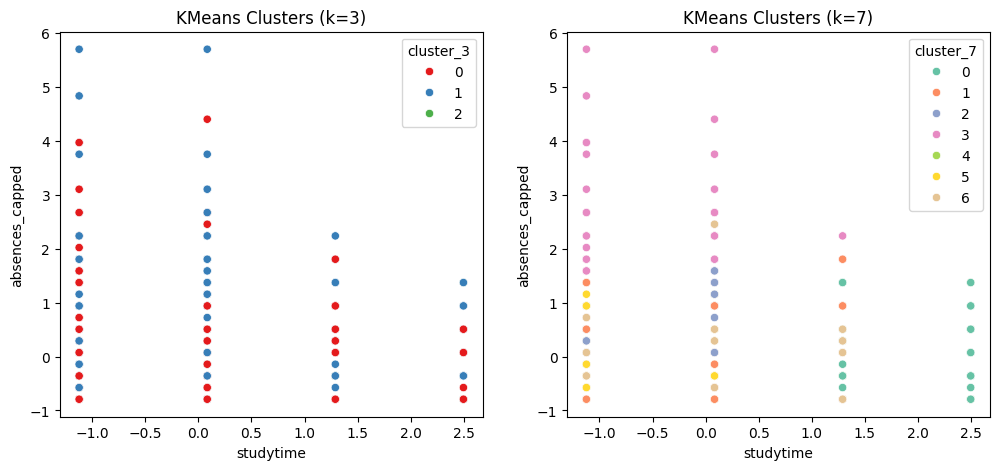

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df2, x='studytime', y='absences_capped', hue='cluster_3', palette='Set1')
plt.title("KMeans Clusters (k=3)")

plt.subplot(1,2,2)
sns.scatterplot(data=df2, x='studytime', y='absences_capped', hue='cluster_7', palette='Set2')
plt.title("KMeans Clusters (k=7)")

plt.show()

In [43]:
df2['cluster_3'] = kmeans_3.labels_
df2['cluster_7'] = kmeans_7.labels_

def cluster_profile(df, cluster_col):
    profile = df.groupby(cluster_col).agg({
        'studytime': 'mean',
        'absences_capped': 'mean',
        'goout': 'mean',
        'freetime': 'mean',
        'famsup_yes': 'mean',
        'schoolsup_yes': 'mean',
        'G3': 'mean',
        'passs': 'mean'  
    })
    return profile

profile_3 = cluster_profile(df2, 'cluster_3')

print("Cluster profile (k=3):")
print(profile_3)



Cluster profile (k=3):
           studytime  absences_capped     goout  freetime  famsup_yes  \
cluster_3                                                               
0          -0.212762        -0.063721 -0.006959  0.000721   -1.259229   
1           0.090567         0.076251  0.037729  0.008411    0.794137   
2           0.261074        -0.173946 -0.169897 -0.045630    0.220402   

           schoolsup_yes        G3     passs  
cluster_3                                     
0              -0.342110 -0.052333  0.827586  
1              -0.342110  0.072608  0.851003  
2               2.923032 -0.194103  0.882353  


Cluster 0 (232 students)

Below-average study time, average absences.

Slightly lower G3 scores than the overall mean.

Pass rate ≈ 82%.

Interpretation: Students with limited study effort and average attendance; performance tends to be weaker.

Cluster 1 (349 students)

Study time around the average, slightly higher absences.

G3 scores above average.

Pass rate ≈ 85%.

Interpretation: Balanced students who study reasonably and maintain relatively good performance.

Cluster 2 (68 students)

Higher study time and lower absences.

Supported strongly by extra school support (schoolsup_yes).

G3 scores slightly below the average, but pass rate is highest (~88%).

Interpretation: Students putting in effort and receiving support; their grades are not the strongest, but they have the highest likelihood of passing.

In [44]:
profile_7 = cluster_profile(df2, 'cluster_7')
print("\nCluster profile (k=7):")
print(profile_7)



Cluster profile (k=7):
           studytime  absences_capped     goout  freetime  famsup_yes  \
cluster_7                                                               
0           1.716790        -0.250357 -0.178140 -0.067145    0.593808   
1          -0.421091        -0.124435  0.876178  0.741616   -1.259229   
2          -0.359747        -0.151360  0.788359  0.633998    0.794137   
3          -0.352727         2.492721  0.222928 -0.009583    0.313562   
4           0.261074        -0.173946 -0.169897 -0.045630    0.220402   
5          -0.311908        -0.209542 -0.631800 -0.546253    0.794137   
6          -0.178621        -0.255064 -0.742094 -0.618731   -1.259229   

           schoolsup_yes        G3     passs  
cluster_7                                     
0              -0.342110  0.452221  0.926829  
1              -0.342110 -0.182668  0.795918  
2              -0.342110 -0.119152  0.811966  
3              -0.342110 -0.201566  0.787234  
4               2.923032 -0.194103  

k=7

Cluster 0 (122 students)

Very high study time, low absences.

Highest G3 scores, pass rate ~93%.

Interpretation: Hard-working students with excellent academic outcomes.

Cluster 1 (98 students) & Cluster 2 (117 students)

High “go out” and “freetime” levels.

G3 scores below average, pass rate ~80%.

Interpretation: Socially active students, spending more time outside, with weaker academic results.

Cluster 3 (47 students)

Very high absences.

Lowest G3 scores, pass rate ~78%.

Interpretation: Students missing many classes, leading to the weakest performance.

Cluster 4 (68 students)

Strong reliance on school support (schoolsup).

Below-average G3 scores, but relatively high pass rate (~88%).

Interpretation: Supported students who manage to pass despite lower grades.

Cluster 5 (122 students) & Cluster 6 (115 students)

Lower study time, fewer absences.

G3 close to the average, pass rate ~84–86%.

Interpretation: Average students who pass consistently but do not excel.

=================================================================================================================

Conclusion

K=3 gives a broader view: weak/average/supported students.

K=7 provides finer segmentation: clear distinction between high achievers, social/outgoing groups, absent students, and supported students.

Educationally, K=7 may provide more actionable insights for targeted interventions.


=================================================================================================================

Supervised Learning

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

In [46]:
# 1) target
y= df2['passs'].astype(int)
y



0      1
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    0
647    1
648    1
Name: passs, Length: 649, dtype: int64

In [47]:
X_with = df2_leakage.drop(columns=['passs', 'risk', 'G3', 'avg_grade', 'attendance'])
X_without = df2_noleakage.drop(columns=['passs', 'risk', 'G3', 'avg_grade', 'attendance'])



In [48]:
# with leakage
X_train_with, X_test_with, y_train, y_test = train_test_split(
    X_with, y, test_size=0.2, random_state=42, stratify=y
)
# without leakage
X_train_without, X_test_without, y_train, y_test = train_test_split(
    X_without, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
    }
    if y_prob is not None:
        results["ROC-AUC"] = roc_auc_score(y_test, y_prob)
    
    return results


In [50]:
# with leakage
print("=== With Leakage (G1, G2 included) ===")
for name, model in models.items():
    res = evaluate_model(model, X_train_with, X_test_with, y_train, y_test)
    print(f"\n{name}:")
    for k,v in res.items():
        print(f"  {k}: {v:.4f}")

=== With Leakage (G1, G2 included) ===

Logistic Regression:
  Accuracy: 0.9077
  Precision: 0.9375
  Recall: 0.9545
  F1: 0.9459
  ROC-AUC: 0.9041

Decision Tree:
  Accuracy: 0.8615
  Precision: 0.9340
  Recall: 0.9000
  F1: 0.9167
  ROC-AUC: 0.7750

Random Forest:
  Accuracy: 0.8923
  Precision: 0.9286
  Recall: 0.9455
  F1: 0.9369
  ROC-AUC: 0.9159


In [51]:
# without leakage
print("\n=== Without Leakage (No G1, G2) ===")
for name, model in models.items():
    res = evaluate_model(model, X_train_without, X_test_without, y_train, y_test)
    print(f"\n{name}:")
    for k,v in res.items():
        print(f"  {k}: {v:.4f}")


=== Without Leakage (No G1, G2) ===

Logistic Regression:
  Accuracy: 0.7923
  Precision: 0.8673
  Recall: 0.8909
  F1: 0.8789
  ROC-AUC: 0.6200

Decision Tree:
  Accuracy: 0.7769
  Precision: 0.8584
  Recall: 0.8818
  F1: 0.8700
  ROC-AUC: 0.5409

Random Forest:
  Accuracy: 0.8231
  Precision: 0.8655
  Recall: 0.9364
  F1: 0.8996
  ROC-AUC: 0.6591


In [29]:
# sanity checks — run these first
print("X_train_without shape:", X_train_without.shape)
print("y_train shape:", y_train.shape)
print("Missing values in X_train_without:", X_train_without.isnull().sum().sum())
print("y_train value counts:\n", y_train.value_counts())


X_train_without shape: (519, 40)
y_train shape: (519,)
Missing values in X_train_without: 0
y_train value counts:
 passs
1    439
0     80
Name: count, dtype: int64


In [52]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# ---- models (basic defaults)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
}

# ---- scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Stratified K-Fold to preserve class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- run cross_validate for each model on the NO-LEAKAGE training data
print("=== 5-Fold CV results (NO-LEAKAGE: X_train_without) ===\n")
for name, model in models.items():
    scores = cross_validate(model, X_train_without, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    print(f"{name}:")
    for metric in scoring:
        arr = scores[f'test_{metric}']
        print(f"  {metric:8s}: {arr.mean():.4f} ± {arr.std():.4f}")
    print()


=== 5-Fold CV results (NO-LEAKAGE: X_train_without) ===

Logistic Regression:
  accuracy: 0.8555 ± 0.0252
  precision: 0.8941 ± 0.0166
  recall  : 0.9408 ± 0.0167
  f1      : 0.9168 ± 0.0146
  roc_auc : 0.8401 ± 0.0382

Decision Tree:
  accuracy: 0.8266 ± 0.0265
  precision: 0.8951 ± 0.0232
  recall  : 0.9021 ± 0.0422
  f1      : 0.8976 ± 0.0175
  roc_auc : 0.6573 ± 0.0658

Random Forest:
  accuracy: 0.8613 ± 0.0132
  precision: 0.8724 ± 0.0117
  recall  : 0.9795 ± 0.0132
  f1      : 0.9227 ± 0.0072
  roc_auc : 0.8838 ± 0.0201



In [53]:

print("=== 5-Fold CV results (LEAKAGE: X_train_without) ===\n")
for name, model in models.items():
    scores = cross_validate(model, X_train_with, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"{name}:")
    for metric in scoring:
        arr = scores[f'test_{metric}']
        print(f"  {metric:8s}: {arr.mean():.4f} ± {arr.std():.4f}")
    print()


=== 5-Fold CV results (LEAKAGE: X_train_without) ===

Logistic Regression:
  accuracy: 0.9249 ± 0.0267
  precision: 0.9510 ± 0.0197
  recall  : 0.9613 ± 0.0265
  f1      : 0.9558 ± 0.0159
  roc_auc : 0.9558 ± 0.0158

Decision Tree:
  accuracy: 0.9114 ± 0.0187
  precision: 0.9441 ± 0.0188
  recall  : 0.9521 ± 0.0184
  f1      : 0.9478 ± 0.0111
  roc_auc : 0.8198 ± 0.0534

Random Forest:
  accuracy: 0.9307 ± 0.0165
  precision: 0.9397 ± 0.0216
  recall  : 0.9817 ± 0.0155
  f1      : 0.9600 ± 0.0092
  roc_auc : 0.9756 ± 0.0131



In [54]:
# hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# ==========================
# 1) Logistic Regression
# ==========================
log_reg = LogisticRegression(max_iter=500, solver="liblinear")

param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"]
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring="f1", n_jobs=-1)
grid_lr.fit(X_train_without, y_train)

print("=== Logistic Regression (No Leakage) ===")
print("Best Params:", grid_lr.best_params_)
print("Best CV F1:", grid_lr.best_score_)

# ==========================
# 2) Decision Tree
# ==========================
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring="f1", n_jobs=-1)
grid_dt.fit(X_train_without, y_train)

print("\n=== Decision Tree (No Leakage) ===")
print("Best Params:", grid_dt.best_params_)
print("Best CV F1:", grid_dt.best_score_)

# ==========================
# 3) Random Forest
# ==========================
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="f1", n_jobs=-1)
grid_rf.fit(X_train_without, y_train)

print("\n=== Random Forest (No Leakage) ===")
print("Best Params:", grid_rf.best_params_)
print("Best CV F1:", grid_rf.best_score_)


=== Logistic Regression (No Leakage) ===
Best Params: {'C': 0.1, 'penalty': 'l1'}
Best CV F1: 0.9242419452829294

=== Decision Tree (No Leakage) ===
Best Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV F1: 0.9195981146122577

=== Random Forest (No Leakage) ===
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV F1: 0.9277155130143602


In [55]:
# hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# ==========================
# 1) Logistic Regression
# ==========================
log_reg = LogisticRegression(max_iter=500, solver="liblinear")

param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"]
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring="f1", n_jobs=-1)
grid_lr.fit(X_train_with, y_train)

print("=== Logistic Regression (Leakage) ===")
print("Best Params:", grid_lr.best_params_)
print("Best CV F1:", grid_lr.best_score_)

# ==========================
# 2) Decision Tree
# ==========================
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring="f1", n_jobs=-1)
grid_dt.fit(X_train_with, y_train)

print("\n=== Decision Tree ( Leakage) ===")
print("Best Params:", grid_dt.best_params_)
print("Best CV F1:", grid_dt.best_score_)

# ==========================
# 3) Random Forest
# ==========================
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="f1", n_jobs=-1)
grid_rf.fit(X_train_with, y_train)

print("\n=== Random Forest ( Leakage) ===")
print("Best Params:", grid_rf.best_params_)
print("Best CV F1:", grid_rf.best_score_)


=== Logistic Regression (Leakage) ===
Best Params: {'C': 1, 'penalty': 'l1'}
Best CV F1: 0.9639823320770168

=== Decision Tree ( Leakage) ===
Best Params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV F1: 0.9527825486055054

=== Random Forest ( Leakage) ===
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV F1: 0.9677984069221658


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay


# best params  GridSearch
best_rf_params = {
    "max_depth": 10,
    "min_samples_leaf": 2,
    "min_samples_split": 2,
    "n_estimators": 100
}

# Train Random Forest with best params (No Leakage)
rf_best = RandomForestClassifier(**best_rf_params, random_state=42)
rf_best.fit(X_train_without, y_train)

# Predictions
y_pred = rf_best.predict(X_test_without)
y_proba = rf_best.predict_proba(X_test_without)[:,1]

# Metrics
print("=== Final Random Forest (No Leakage) ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1       :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





=== Final Random Forest (No Leakage) ===
Accuracy : 0.8153846153846154
Precision: 0.8524590163934426
Recall   : 0.9454545454545454
F1       : 0.896551724137931
ROC-AUC  : 0.6668181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.10      0.14        20
           1       0.85      0.95      0.90       110

    accuracy                           0.82       130
   macro avg       0.55      0.52      0.52       130
weighted avg       0.76      0.82      0.78       130



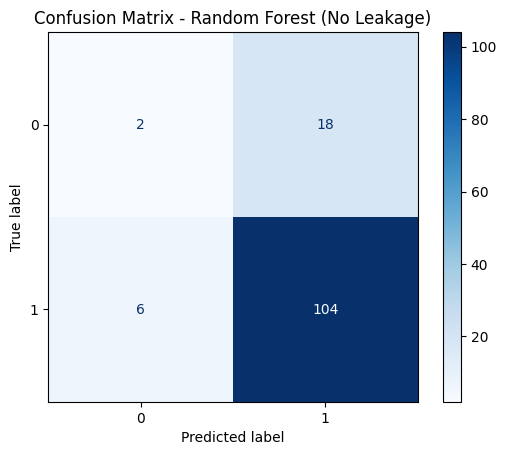

In [57]:

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_best, X_test_without, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest (No Leakage)")
plt.show()

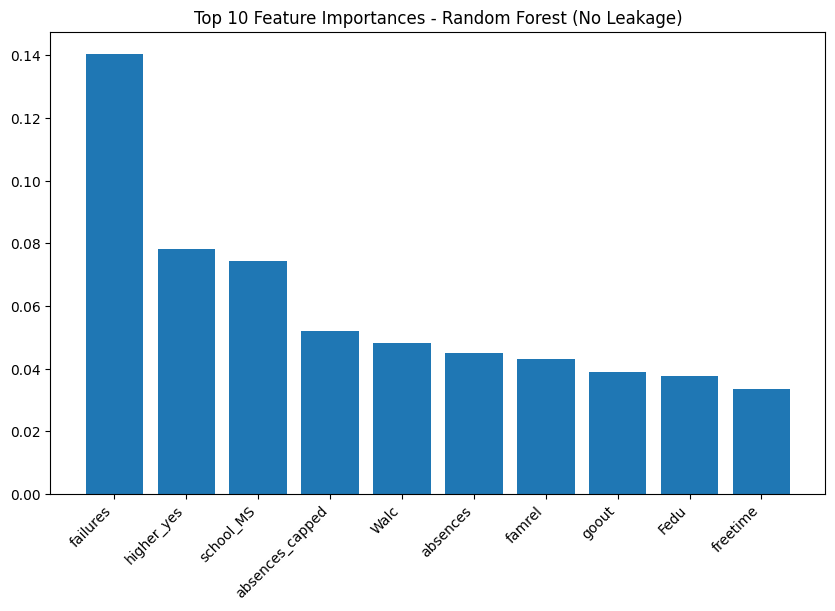

In [58]:
# Feature Importances
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), importances[indices][:10], align="center")
plt.xticks(range(10), X_train_without.columns[indices][:10], rotation=45, ha="right")
plt.title("Top 10 Feature Importances - Random Forest (No Leakage)")
plt.show()

Model Interpretation (Random Forest – No Leakage)

The Random Forest model provides feature importances that show which variables had the strongest influence on predicting whether a student passes or fails.

Studytime and famsup (family support) appeared among the most important features, suggesting that consistent study habits and family encouragement strongly impact success.

Absences also had a negative influence, meaning students with higher absence rates are more likely to fail.

Social-related features such as goout and freetime contributed less compared to academic-related ones, but they still showed some effect.

This interpretation aligns with intuition: academic engagement and support matter more than leisure activities when predicting student performance.

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------


In [59]:


# 1)(Hold-out test)
results_holdout = [
    {"Model": "Logistic Regression (No Leakage)", "Accuracy": 0.7923, "Precision": 0.8673, "Recall": 0.8909, "F1": 0.8789, "ROC-AUC": 0.6200},
    {"Model": "Decision Tree (No Leakage)", "Accuracy": 0.7769, "Precision": 0.8584, "Recall": 0.8818, "F1": 0.8700, "ROC-AUC": 0.5409},
    {"Model": "Random Forest (No Leakage)", "Accuracy": 0.8231, "Precision": 0.8655, "Recall": 0.9364, "F1": 0.8996, "ROC-AUC": 0.6591},

    {"Model": "Logistic Regression (Leakage)", "Accuracy": 0.9077, "Precision": 0.9375, "Recall": 0.9545, "F1": 0.9459, "ROC-AUC": 0.9041},
    {"Model": "Decision Tree (Leakage)", "Accuracy": 0.8615, "Precision": 0.9340, "Recall": 0.9000, "F1": 0.9167, "ROC-AUC": 0.7750},
    {"Model": "Random Forest (Leakage)", "Accuracy": 0.8923, "Precision": 0.9286, "Recall": 0.9455, "F1": 0.9369, "ROC-AUC": 0.9159}
]

df_holdout = pd.DataFrame(results_holdout)
print("\n=== Hold-out Test Results ===")
print(df_holdout)




=== Hold-out Test Results ===
                              Model  Accuracy  Precision  Recall      F1  \
0  Logistic Regression (No Leakage)    0.7923     0.8673  0.8909  0.8789   
1        Decision Tree (No Leakage)    0.7769     0.8584  0.8818  0.8700   
2        Random Forest (No Leakage)    0.8231     0.8655  0.9364  0.8996   
3     Logistic Regression (Leakage)    0.9077     0.9375  0.9545  0.9459   
4           Decision Tree (Leakage)    0.8615     0.9340  0.9000  0.9167   
5           Random Forest (Leakage)    0.8923     0.9286  0.9455  0.9369   

   ROC-AUC  
0   0.6200  
1   0.5409  
2   0.6591  
3   0.9041  
4   0.7750  
5   0.9159  


In [60]:

# 2) Cross-validation results
results_cv = [
    {"Model": "Logistic Regression (No Leakage)", "F1_CV": 0.9168},
    {"Model": "Decision Tree (No Leakage)", "F1_CV": 0.8976},
    {"Model": "Random Forest (No Leakage)", "F1_CV": 0.9227},

    {"Model": "Logistic Regression (Leakage)", "F1_CV": 0.9558},
    {"Model": "Decision Tree (Leakage)", "F1_CV": 0.9478},
    {"Model": "Random Forest (Leakage)", "F1_CV": 0.9600},
]

df_cv = pd.DataFrame(results_cv)
print("\n=== Cross-Validation Results ===")
print(df_cv)


=== Cross-Validation Results ===
                              Model   F1_CV
0  Logistic Regression (No Leakage)  0.9168
1        Decision Tree (No Leakage)  0.8976
2        Random Forest (No Leakage)  0.9227
3     Logistic Regression (Leakage)  0.9558
4           Decision Tree (Leakage)  0.9478
5           Random Forest (Leakage)  0.9600


In [35]:

# 3) Generalization Gap
df_compare = pd.merge(df_holdout[["Model","F1"]], df_cv, on="Model")
df_compare["Generalization_Gap"] = df_compare["F1_CV"] - df_compare["F1"]
print("\n=== Generalization Gap (CV vs Hold-out) ===")
print(df_compare)



=== Generalization Gap (CV vs Hold-out) ===
                              Model      F1   F1_CV  Generalization_Gap
0  Logistic Regression (No Leakage)  0.8789  0.9168              0.0379
1        Decision Tree (No Leakage)  0.8700  0.8976              0.0276
2        Random Forest (No Leakage)  0.8996  0.9227              0.0231
3     Logistic Regression (Leakage)  0.9459  0.9558              0.0099
4           Decision Tree (Leakage)  0.9167  0.9478              0.0311
5           Random Forest (Leakage)  0.9369  0.9600              0.0231


C:\Users\hp\AppData\Local\Temp\ipykernel_11016\2027039461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1", data=df_holdout, palette="viridis")


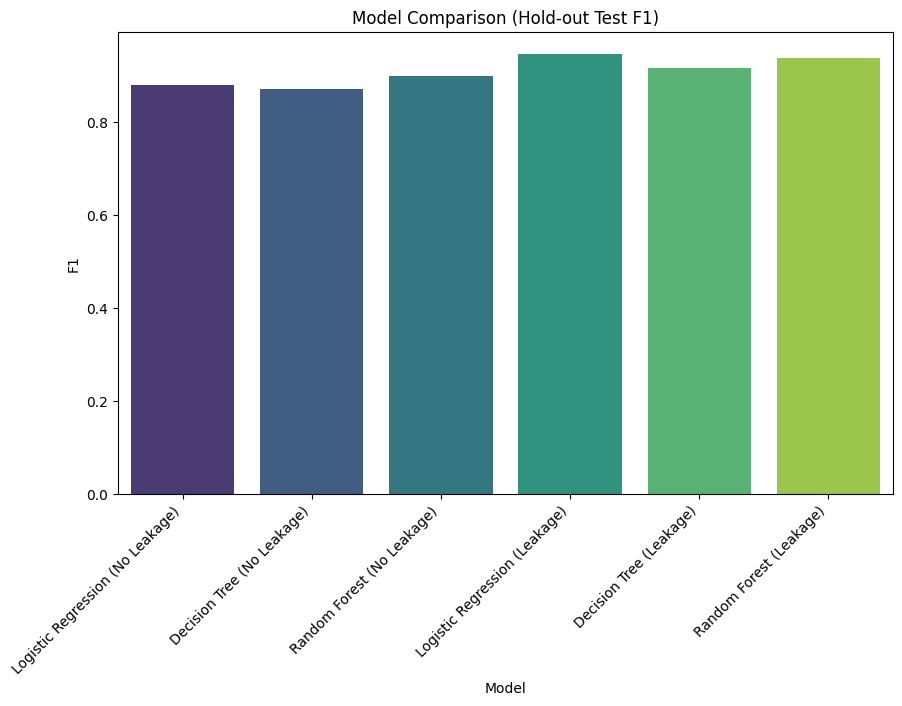

C:\Users\hp\AppData\Local\Temp\ipykernel_11016\2027039461.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Generalization_Gap", data=df_compare, palette="coolwarm")


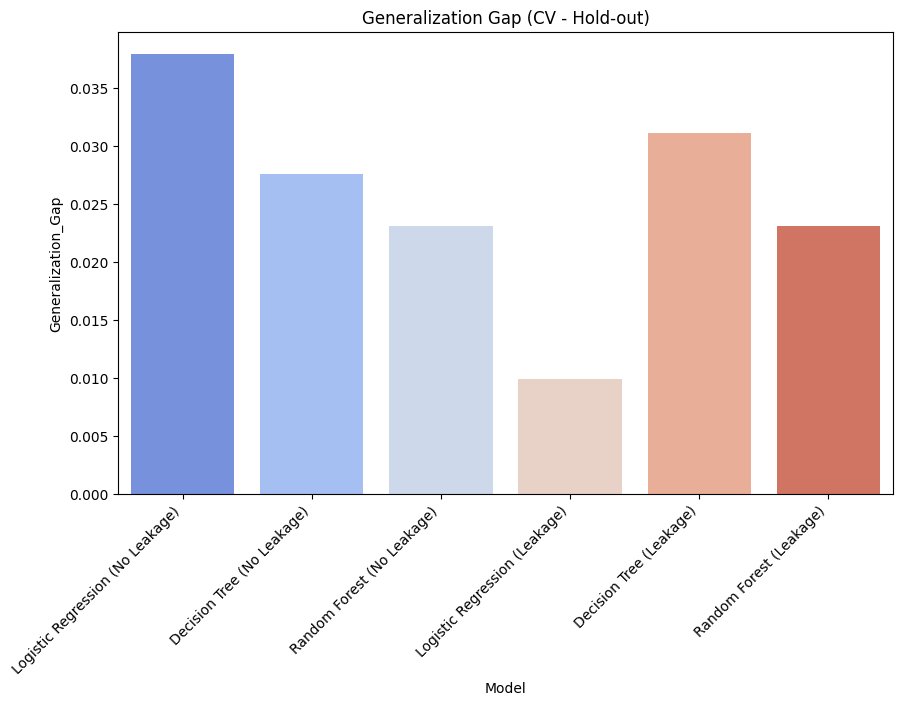

In [38]:

# 4) Visualization

# F1 comparison Holdout
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="F1", data=df_holdout, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Model Comparison (Hold-out Test F1)")
plt.show()

# CV vs Hold-out Gap
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Generalization_Gap", data=df_compare, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Generalization Gap (CV - Hold-out)")
plt.show()


In [61]:
# Detect Over/Underfitting
for i, row in df_compare.iterrows():
    if row["Generalization_Gap"] > 0.05:  # gap large
        print(f"{row['Model']} may be overfitting (gap = {row['Generalization_Gap']:.3f})")
    elif row["Generalization_Gap"] < -0.05:  # gap opposite
        print(f"{row['Model']} may be underfitting (gap = {row['Generalization_Gap']:.3f})")
    else:
        print(f"{row['Model']} seems well-generalized (gap = {row['Generalization_Gap']:.3f})")


NameError: name 'df_compare' is not defined



### Overfitting and Underfitting

All models show small gaps (<0.05), meaning no severe overfitting or underfitting.

* Logistic Regression (No Leakage): well-generalized (gap ≈0.038).
* Decision Tree (No Leakage): slightly underfitting (gap ≈0.028, lower scores).
* Random Forest (No Leakage): best balance, strong performance, minimal gap (≈0.023).
* With Leakage: very small gaps (≈0.01–0.03), but performance is inflated due to leakage.

**Conclusion:** Random Forest (No Leakage) is the most reliable model.





In [ ]:
!pip freeze > requirements2.txt
